<a href="https://colab.research.google.com/github/nklbigone/DIC-ML/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **problem 1**

https://www.tensorflow.org/tutorials/images/cnn

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

**Time to compilation and training Model**

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 27s 8ms/step - loss: 0.1520 - accuracy: 0.9526 - val_loss: 0.0455 - val_accuracy: 0.9846
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0310 - val_accuracy: 0.9895
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0375 - val_accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0274 - val_accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0327 - val_accuracy: 0.9904


**Time to Evaluate the model**

313/313 - 2s - loss: 0.0327 - accuracy: 0.9904 - 2s/epoch - 5ms/step


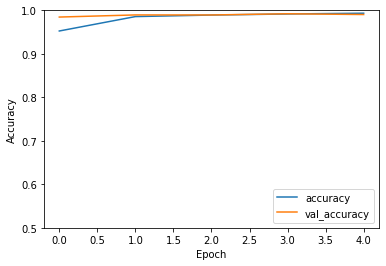

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print(test_acc)

0.9904000163078308


**Problem 3**

In [19]:
import numpy as np
import pandas as pd
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam # - Works

dataset_path ="/Iris.csv"
df = pd.read_csv(dataset_path)

df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [20]:
K.clear_session( )

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________


In [24]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 37ms/step - loss: 0.3339 - accuracy: 0.8750 - val_loss: 0.1131 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2037 - accuracy: 0.9375 - val_loss: 0.1398 - val_accuracy: 0.9375
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 0.1352 - accuracy: 0.9531 - val_loss: 0.1166 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.1315 - accuracy: 0.9531 - val_loss: 0.0627 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.1315 - accuracy: 0.9375 - val_loss: 0.0594 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 9ms/step - loss: 0.0873 - accuracy: 0.9688 - val_loss: 0.0584 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 9ms/step - loss: 0.0915 - accuracy: 0.9688 - val_loss: 0.0537 - val_accuracy: 1.0000
Epoch 8/10
7/7 [==============

In [25]:
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

y_pred_proba [4.2246286e-02 9.9983919e-01 2.0278569e-02 9.9998188e-01 9.9704093e-01
 9.9994874e-01 3.2823858e-01 9.8352206e-01 9.9996567e-01 9.9865830e-01
 9.9958366e-01 9.9967110e-01 9.9994612e-01 2.3355193e-01 6.2512385e-04
 4.7975406e-03 9.5722872e-01 9.5648161e-04 9.9532568e-01 4.6635042e-03]
y_pred [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]
y_test [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


In [26]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.4639057219028473
Train accuracy: 0.8999999761581421


**Problen 4**

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
dataset_path ="/Iris.csv"
df = pd.read_csv(dataset_path)

y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int)[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train)
y_val_one_hot = enc.transform(y_val)
y_test_one_hot = enc.transform(y_test)

In [30]:
K.clear_session( )
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(3, activation = tf.nn.softmax))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_one_hot,
                    batch_size=10,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_val, y_val_one_hot))

In [33]:
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba >0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

y_pred_proba [4.1600281e-08 1.4091991e-03 9.9986923e-01 5.8312217e-08 9.9896944e-01
 8.5237567e-10 9.9939215e-01 9.8065741e-04 3.0982145e-04 6.3739554e-03
 4.1465807e-07 2.6054864e-03 4.4394494e-04 5.2607292e-04 4.5801137e-04
 9.9816388e-01 8.5243315e-04 5.9539831e-04 9.9777526e-01 9.9975961e-01
 1.7037530e-06 9.3411707e-04 9.9701095e-01 9.9682605e-01 1.1692426e-04
 9.9968970e-01 9.9858367e-01 2.7456419e-03 2.0227790e-02 9.9842995e-01]
y_pred [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1]
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [34]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

y_pred [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [35]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.07536531239748001
Train accuracy: 0.9666666388511658


# problem **5**

In [40]:
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('train.csv')

x = train[['GrLivArea', 'YearBuilt']]
y = train[['SalePrice']]

x = np.log(x).values
y = np.log(y).values

sc = StandardScaler()
sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [41]:
K.clear_session( )

In [42]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(2,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,351
Trainable params: 5,351
Non-trainable params: 0
_________________________________________________________________


In [44]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(loss='mse',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['mse'])
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=20,
                    verbose=1,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))

Epoch 1/20
94/94 [==============================] - 2s 11ms/step - loss: 4.7553 - mse: 4.7553 - val_loss: 0.0896 - val_mse: 0.0896
Epoch 2/20
94/94 [==============================] - 1s 9ms/step - loss: 0.0796 - mse: 0.0796 - val_loss: 0.1193 - val_mse: 0.1193
Epoch 3/20
94/94 [==============================] - 1s 9ms/step - loss: 0.0882 - mse: 0.0882 - val_loss: 0.0955 - val_mse: 0.0955
Epoch 4/20
94/94 [==============================] - 1s 8ms/step - loss: 0.0801 - mse: 0.0801 - val_loss: 0.0760 - val_mse: 0.0760
Epoch 5/20
94/94 [==============================] - 1s 9ms/step - loss: 0.0856 - mse: 0.0856 - val_loss: 0.0884 - val_mse: 0.0884
Epoch 6/20
94/94 [==============================] - 1s 8ms/step - loss: 0.0930 - mse: 0.0930 - val_loss: 0.0754 - val_mse: 0.0754
Epoch 7/20
94/94 [==============================] - 1s 8ms/step - loss: 0.0895 - mse: 0.0895 - val_loss: 0.1197 - val_mse: 0.1197


In [49]:
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba
print("y_pred", y_pred.ravel()[:5])
print('y_test', y_test.ravel()[:5])

y_pred [12.745876  12.304385  12.052868  12.5483885 11.968922 ]
y_test [12.20918779 11.79810441 11.60823564 12.16525065 11.38509209]


In [50]:
score = model.evaluate(X_test, y_test, verbose=0)
print('loss (test):', score[0])
print('Mean Squared Error (test):', score[1])

loss (test): 0.10550981014966965
Mean Squared Error (test): 0.10550981014966965


# **problem 6**

In [51]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

In [52]:
K.clear_session( )

In [53]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])
history = model.fit(X_train, y_train_one_hot,
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_val, y_val_one_hot))

Epoch 1/5
2400/2400 [==============================] - 10s 4ms/step - loss: 0.1211 - accuracy: 0.9663 - val_loss: 0.1739 - val_accuracy: 0.9552
Epoch 2/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1133 - accuracy: 0.9675 - val_loss: 0.1931 - val_accuracy: 0.9554
Epoch 3/5
2400/2400 [==============================] - 10s 4ms/step - loss: 0.1022 - accuracy: 0.9713 - val_loss: 0.2253 - val_accuracy: 0.9477
Epoch 4/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1015 - accuracy: 0.9714 - val_loss: 0.2082 - val_accuracy: 0.9514
Epoch 5/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0945 - accuracy: 0.9743 - val_loss: 0.2104 - val_accuracy: 0.9551


In [57]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred", y_pred[:10])
print('y_test', y_test.ravel()[:10])

y_pred [7 2 1 0 4 1 4 9 5 9]
y_test [7 2 1 0 4 1 4 9 5 9]


In [58]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18823623657226562
Test accuracy: 0.9611999988555908
